# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.094035e+01     9.245472e+00
 * time: 0.004985809326171875
     1     2.703983e+01     4.871344e+00
 * time: 0.014551877975463867
     2     2.198322e+01     7.754385e+00
 * time: 0.037117958068847656
     3     1.304428e+01     2.588389e+00
 * time: 0.06415081024169922
     4     1.253870e+01     4.605286e+00
 * time: 0.08212780952453613
     5     1.134848e+01     2.913871e+00
 * time: 0.10460901260375977
     6     1.034683e+01     2.848759e+00
 * time: 0.12276101112365723
     7     9.613210e+00     1.706687e+00
 * time: 0.14096689224243164
     8     9.215193e+00     1.168815e+00
 * time: 0.21498990058898926
     9     8.939996e+00     6.257064e-01
 * time: 0.23314380645751953
    10     8.842435e+00     9.797111e-01
 * time: 0.24692487716674805
    11     8.767050e+00     7.940835e-01
 * time: 0.2605118751525879
    12     8.692310e+00     6.791672e-01
 * time: 0.2741568088531494
    13     8.629706e+00     4.443813e-01
 * time

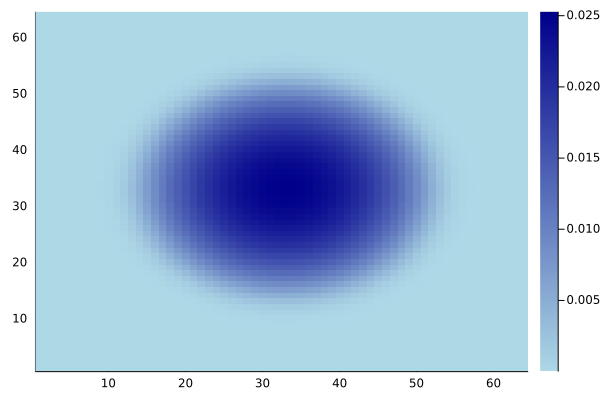

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)